In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict





In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])



In [3]:
np.random.seed(0)

In [4]:
X_train_load = pd.read_csv('./data/task1_12_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_12_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_12_test_X.csv',header=None, sep=' ').as_matrix()

In [5]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 100)
(1000,)
(10000, 100)


In [6]:
# for i in range(X_train_load.shape[1]):
#     print(anderson(X_train_load[np.where(y_train_load==1)][:,i])[0], anderson(X_train_load[np.where(y_train_load==0)][:,i])[0])
    

In [7]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
# skb = SelectKBest(chi2, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function mutual_info_classif at 0x1144b7b70>)

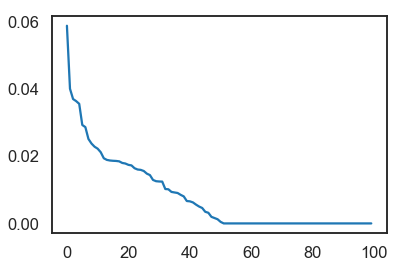

In [8]:
plt.plot(np.sort(skb.scores_)[::-1])
plt.savefig('Practise_12_FeatureSelection.pdf')

In [9]:
np.sort(skb.scores_)[::-1][:51]

array([ 0.05871658,  0.03999425,  0.03694529,  0.03632724,  0.03552091,
        0.02924015,  0.02860477,  0.02508718,  0.02371884,  0.0227819 ,
        0.02219842,  0.02114601,  0.01934992,  0.01886573,  0.01868649,
        0.01860328,  0.01855564,  0.01843681,  0.01796307,  0.01779366,
        0.01739792,  0.01723065,  0.01639163,  0.0160107 ,  0.01590596,
        0.01556772,  0.01478584,  0.01435104,  0.01291648,  0.01253635,
        0.01245428,  0.0124189 ,  0.0102184 ,  0.01014066,  0.00936029,
        0.00919373,  0.00904041,  0.00848648,  0.00802739,  0.00664728,
        0.00655655,  0.00623457,  0.00558023,  0.00500917,  0.00458708,
        0.00345236,  0.00316074,  0.00195584,  0.00159889,  0.00124317,
        0.00045422])

In [10]:
skb.k = 51

In [11]:
X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
# X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)



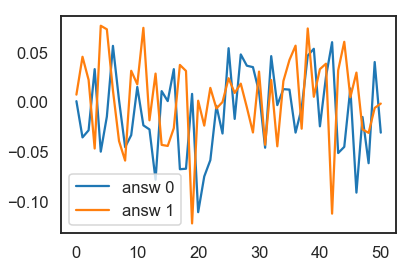

In [12]:
plt.plot(np.mean(X_train[np.where(y_train==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train[np.where(y_train==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')

plt.savefig('Practise_12_FeatureMean.pdf')

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 51)
(1000,)
(10000, 51)


In [14]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-6040 -1000
396


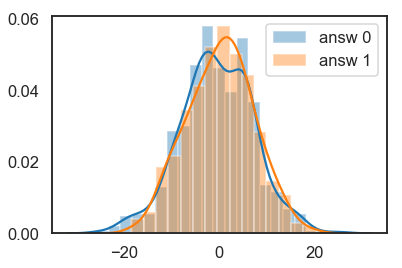

In [15]:
sns.distplot(np.sum(X_train[np.where(y_train==0)], axis = 1), label = 'answ 0')
sns.distplot(np.sum(X_train[np.where(y_train==1)], axis = 1), label = 'answ 1')

plt.legend(loc='best')
plt.savefig('Practise_12_Statistic.pdf')

In [16]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = naive_bayes.GaussianNB().fit(X_train, y_train).predict(X_test)
Predict_For_NUM = naive_bayes.GaussianNB().fit(X_train, y_train).predict(X_test)




ACC 0.854
AUC 0.92611964011
NUM 146
ASY1 -5191
ASY2 -671


In [17]:
rho = 0.99
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = naive_bayes.GaussianNB().fit(X_train, y_train).predict(X_test)





ACC 0.604
AUC 0.92611964011
NUM 396
ASY1 -5644
ASY2 -208


In [18]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = naive_bayes.GaussianNB().fit(X_train, y_train).predict(X_test)



ACC 0.854
AUC 0.92611964011
NUM 146
ASY1 -5191
ASY2 -671


In [19]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_12_answ.csv', sep = ',')
